In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib
import pickle
import networkx as nx
import ipywidgets
from ipywidgets import widgets

from run_simulation import invasion_main

# Running and Visualizing One Simulation

In [2]:
weeks_run = 15
run_mode = 'Baseline'
simulation_df = invasion_main(run_mode, weeks_run) # Change this to change the number of weeks
# print(type(simulation_df))
simulation_df

,County,Week 0,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10,Week 11,Week 12,Week 13,Week 14,Week 15
0,Cook,0.1,0.162919,0.212760,0.541442,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.0
1,DuPage,0.0,0.058246,0.208203,0.522862,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.0
2,Kane,0.3,0.316029,0.450953,0.825165,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.0
3,Will,0.0,0.118042,0.349337,0.901746,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.0
4,Winnebago,0.0,0.305599,0.081583,0.355295,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.935019,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Henderson,0.0,0.000629,0.004397,0.009462,0.032604,0.000000,0.080085,0.120176,0.179680,0.492004,0.914676,1.000000,1.000000,1.0,1.000000,1.0
98,Calhoun,0.0,0.000000,0.033396,0.095484,0.252037,0.631814,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.0
99,Schuyler,0.0,0.000006,0.000014,0.000000,0.016826,0.023315,0.121924,0.441074,0.619461,0.916985,1.000000,1.000000,1.000000,1.0,1.000000,1.0
100,Gallatin,0.0,0.000000,0.000000,0.000608,0.007645,0.019503,0.027151,0.069708,0.168454,0.270491,0.465100,0.927630,1.000000,1.0,1.000000,1.0


In [3]:
def make_visual_df(simulation_df):
    visual_df = simulation_df.T
    visual_df.columns = visual_df.iloc[0]
    visual_df = visual_df.drop(visual_df.index[0])
    return visual_df

visual_df = make_visual_df(simulation_df)
visual_df

County,Cook,DuPage,Kane,Will,Winnebago,Lake,McHenry,St. Clair,Kendall,Madison,...,Scott,Stark,Jasper,Hamilton,Pike,Henderson,Calhoun,Schuyler,Gallatin,Pope
Week 0,0.1,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Week 1,0.162919,0.058246,0.316029,0.118042,0.305599,0.0,0.113435,0.106989,0.164049,0.502959,...,0.005443,0.007765,0.000001,0.0,0.000449,0.000629,0.0,0.000006,0.0,0.0
Week 2,0.21276,0.208203,0.450953,0.349337,0.081583,0.046204,0.300218,0.102595,0.387306,0.603652,...,0.01981,0.01019,0.004749,0.0,0.005228,0.004397,0.033396,0.000014,0.0,0.000002
Week 3,0.541442,0.522862,0.825165,0.901746,0.355295,0.294382,0.803124,0.179327,0.72366,0.643083,...,0.155126,0.175228,0.015284,0.001388,0.0,0.009462,0.095484,0.0,0.000608,0.000002
Week 4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.085427,1.0,0.728322,...,0.628672,0.572514,0.0,0.00649,0.192577,0.032604,0.252037,0.016826,0.007645,0.000015
Week 5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.558487,1.0,0.98217,...,0.94362,1.0,0.0,0.002343,0.49405,0.0,0.631814,0.023315,0.019503,0.005713
Week 6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.94582,1.0,1.0,...,0.97607,1.0,0.287217,0.006836,0.918849,0.080085,1.0,0.121924,0.027151,0.018885
Week 7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.43472,0.060245,1.0,0.120176,1.0,0.441074,0.069708,0.037631
Week 8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.687603,0.246173,1.0,0.17968,1.0,0.619461,0.168454,0.017628
Week 9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.364313,1.0,0.492004,1.0,0.916985,0.270491,0.123627


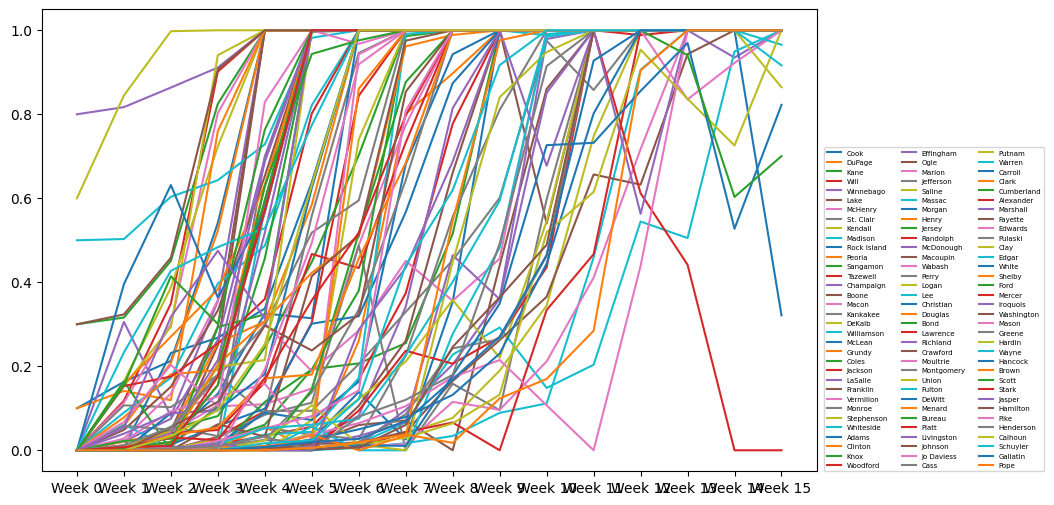

In [4]:
plt.figure(figsize=(10,6))
for county in visual_df.columns:
    plt.plot(visual_df.index, visual_df[county])
plt.legend(visual_df.columns, loc=(1.01, 0), fontsize=5, ncol=3)
plt.show()

In [5]:
path = 'data/location'
edges = pd.read_csv(f'{path}/county_edges.csv')

CG = pickle.load(open(f'{path}/IL_graph.dat', 'rb'))
handler = pickle.load(open(f'{path}/graph_handler_counties.dat', 'rb'))
highways = pickle.load(open(f'{path}/osmnx_highways.dat', 'rb'))

In [6]:
def make_network_heat(week):
    week = f'Week {week}'
#     min_value = simulation_df[week].min()
#     max_value = simulation_df[week].max()  # This makes the scale variable for each chart
    max_value = 1  # This keeps the scale constant 
    min_value = 0
    cmap = matplotlib.colormaps['YlOrRd']

    node_colors = {}
    for node in CG.nodes():
        value = simulation_df.loc[simulation_df['County'] == node.name, week].iloc[0]
        normalized_value = (value - min_value) / (max_value - min_value)
        node_colors[node.name] = cmap(normalized_value)
        
    labels = {node: handler[node.name].name for node in CG.nodes()}
    fig, ax = plt.subplots(figsize=(10, 15))
    node_positions = {node: [node.centroid.x, node.centroid.y] for node in CG.nodes()}
    nx.draw(CG, 
            pos=node_positions,
            ax=ax, 
            node_color=[node_colors.get(node.name, 'gray') for node in CG.nodes()],
            node_size=1500, )

    nx.draw_networkx_labels(CG, 
                            pos=node_positions, 
                            labels=labels,
                            font_size=6, 
                            ax=ax,
                           font_color='k')
    
    edge_colors = ['gray' if CG[src][tgt]['rel'] == 'interstate' else 'k' for src, tgt in CG.edges()]
    edge_widths = [5 if CG[src][tgt]['rel'] == 'interstate' else 1 for src, tgt in CG.edges()]
    nx.draw_networkx_edges(CG, pos=node_positions, edge_color=edge_colors, ax=ax, width=edge_widths)

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min_value, vmax=max_value))
    sm.set_array([])
    sub_ax = plt.axes([0.96, 0.55, 0.02, 0.3])
    plt.colorbar(sm, cax=sub_ax)
    plt.show()

In [7]:
widgets.interact(make_network_heat,
    week=widgets.IntSlider(min=0, max=len(simulation_df.columns)-2, step=1, layout=widgets.Layout(width='800px')),
)

interactive(children=(IntSlider(value=0, description='week', layout=Layout(width='800px'), max=15), Output()),…

<function __main__.make_network_heat(week)>

In [8]:
# This doesn't work very well for me since the page keeps re-centering

play = widgets.interact(make_network_heat, 
    week=widgets.Play( value=0,
                        min=0,
                        max=len(simulation_df.columns) - 2,
                        step=1,
                        interval=500,
                        disabled=False
                    ))

interactive(children=(Play(value=0, description='week', interval=500, max=15), Output()), _dom_classes=('widge…

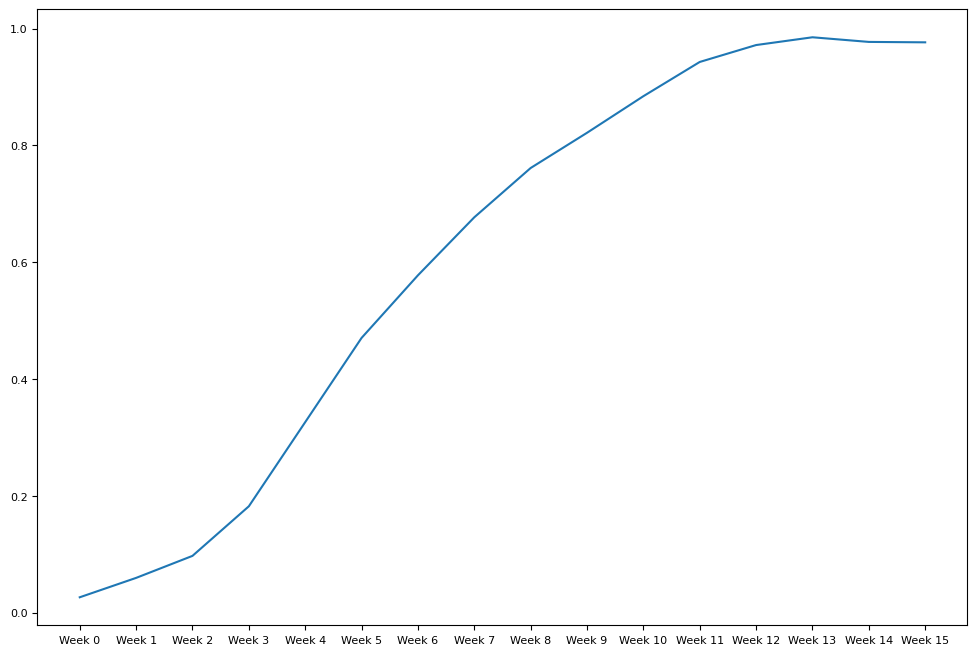

In [9]:
avg_df = visual_df.mean(axis=1)
plt.figure(figsize=(12,8))
plt.plot(avg_df.index, avg_df.iloc[0:, ])
plt.tick_params(labelsize=8)

# Repeating the Simulation and Plotting the Results

In [10]:
def make_average_graphs(df):
    vis_df = make_visual_df(df)
    avg_df = vis_df.mean(axis=1)
    plt.plot(avg_df.index, 
             avg_df.iloc[0:, ],
             linewidth=0.5)

In [11]:
def model_variables(run_mode, sims_run, sim_weeks):
    plt.figure(figsize=(12,8))
    plt.tick_params(labelsize=8)
    
    for i in range(0, sims_run):
        df = invasion_main(run_mode, sim_weeks)
        make_average_graphs(df)
    
    plt.show()

sims_run = 50  # RIP my RAM
sim_weeks = 15

# model_variables('Baseline', sims_run, sim_weeks)

# Model Variables

In [12]:
# widgets.interact(model_variables,
#     run_mode =['Baseline', 'Poison ToH', 'Population-Based Countermeasures', 'Quarantine'],
#     sims_run = (10, 50, 10),
#     sim_weeks = (1, 30, 1),
#     value='Baseline',
#     disabled=False,

# )

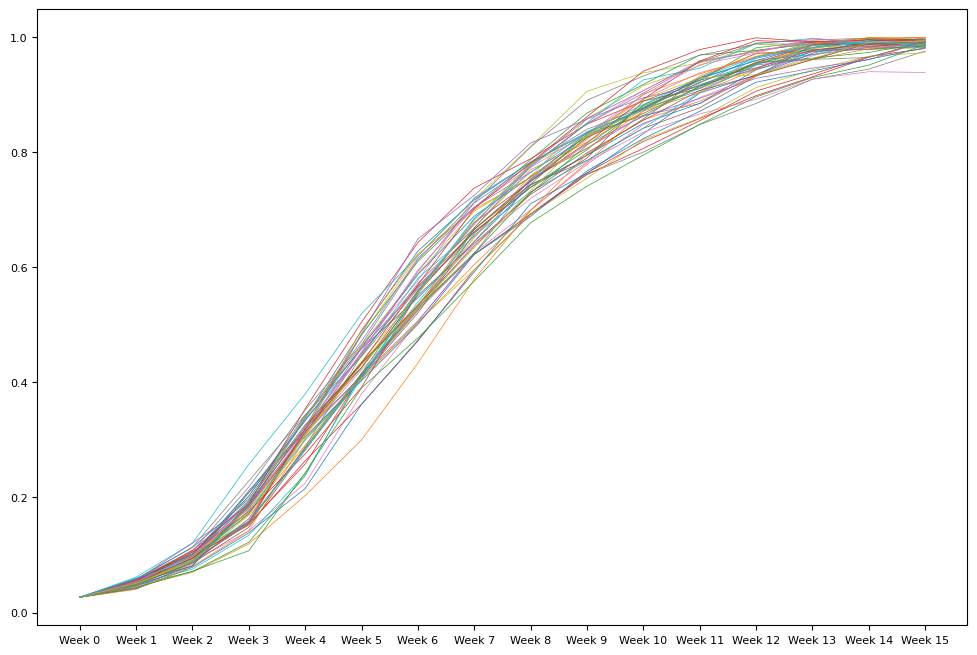

In [13]:
model_variables('Baseline', sims_run, sim_weeks)

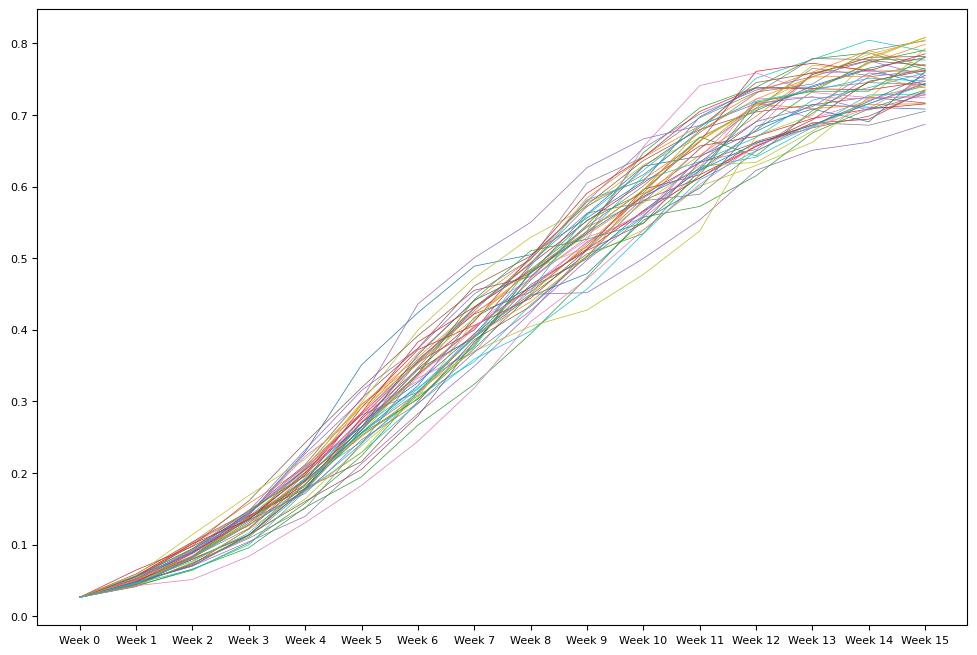

In [14]:
model_variables('Poison ToH', sims_run, sim_weeks)

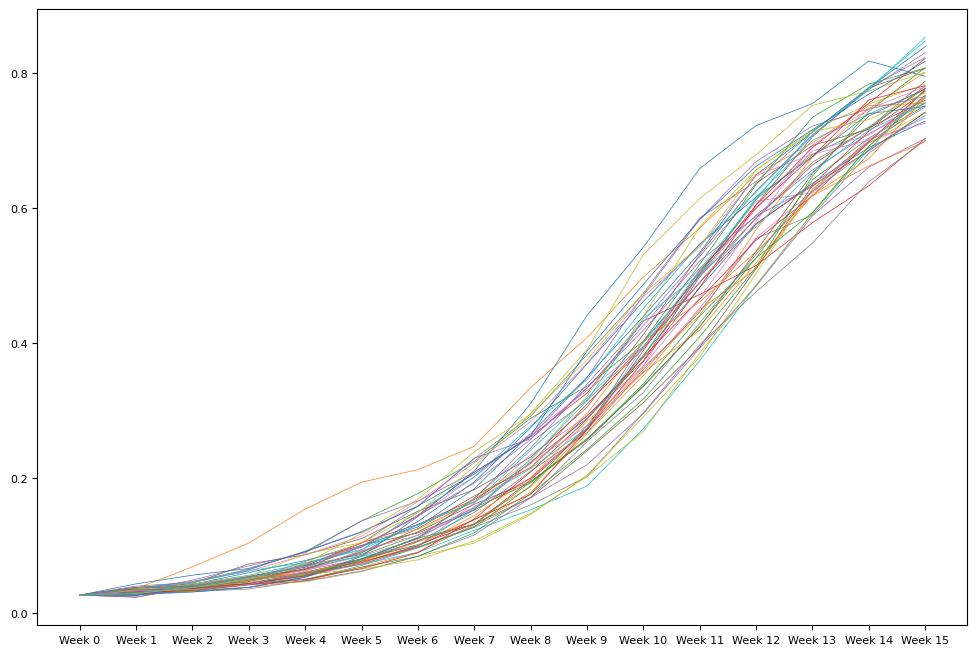

In [15]:
model_variables('Population-Based Countermeasures', sims_run, sim_weeks)

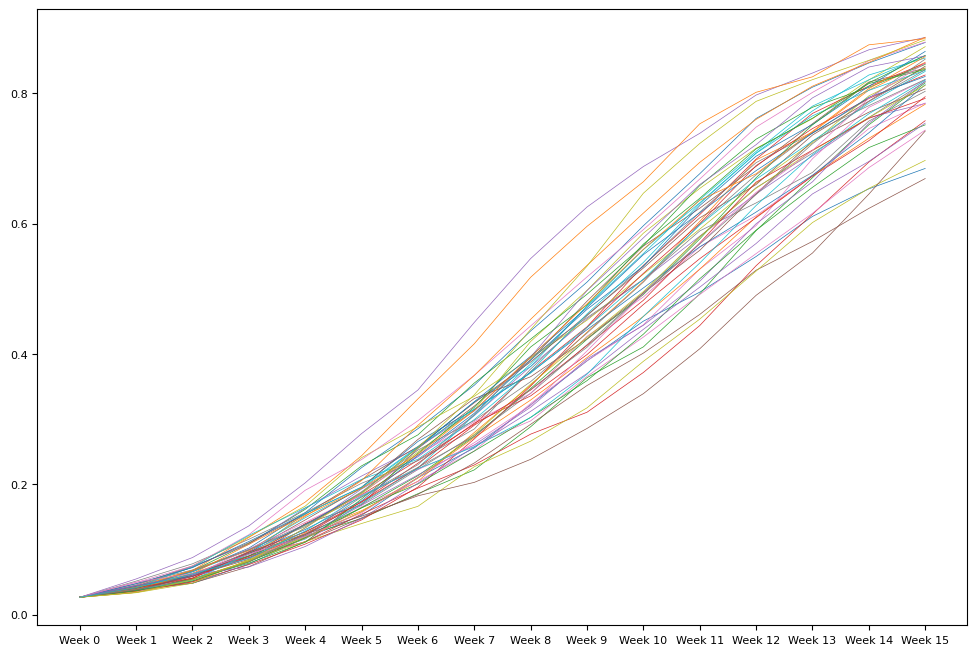

In [16]:
model_variables('Quarantine', sims_run, sim_weeks)

In [17]:
# import seaborn as sns
# import numpy as np
# for i in range(100):
#     print(np.random.choice([True, False]))
#     # print(np.random.normal(0.3, 0.1) * 0.01)
# # sns.kdeplot(np.random.normal(0.5, 0.8))